<a href="https://colab.research.google.com/github/mdruesch98/ptmma25-data-science-for-business-II-team-assignment/blob/main/PTMMA_Introduction_To_Machine_Learning_Coupon_Case_Submission_Template_MD_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

__Mannheim Master in Management Analytics__ <br>
Introduction to Machine Learning, Prof. Dr. Jochen Hartmann

## Individual Case Study: "In-Vehicle Coupon Recommendation"

### Submission Template

In [ ]:
YOUR_NAME = 'Maximilian Drüschler'

*Please use this template for your submission. It should include all analyses (as documented Python code) and answers to the case study. <br> Please refer to the course syllabus for detailed submission instructions.* <br>

For the submission deadline please refer to the syllabus. <br>
__Important:__ Please keep all your answers short and crisp. <br>

The submission template's structure is based on Appendix B: Machine Learning Project Checklist in <a href="https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/">Géron (2019)</a>.

### 1. Frame the Problem

a. What is the objective of this case study (in business terms)? Refer to <a href="https://jmlr.org/papers/volume18/16-003/16-003.pdf">Wang et al. (2017)</a> for further details on the data set (especially Appendix B). <br>
b. Is the problem supervised or unsupervised? <br>
c. What is the classification objective? <br>
d. Describe a comparable problem? Can you reuse experience or tools?

Your Answer / Code Below:

In [ ]:
## a
#

## b
# The problem is supervised.

## c
# The classifier is used to predict whether a customer will accept a coupon for nearby restaurants or coffee houses
# while driving in his/her car. The model is trained on user, contextual (situational) and coupon data.

## d
# In general, it is comparable to all other classification tasks
#  - e.g. the one discussed in the lectures (predicting if a house is in New York or San Francisco by recognizing patterns in the training data).
# Accordingly, I can reuse tools from class like logistics regression,K Nearest Neighbors, SVM, Decision Tree, Random Forest and Neural Network.

# A more similar problem in business context would be to predict if a customer will click on an add when shown (on any website) with features like:
# Previous purchases, click rates, scrolling behavior, date, time, previously visited sites etc..

### 2. Get the Data

a. Load required packages for data analysis (e.g., pandas as pd, numpy as np, os, etc.). <br>
b. Load the file "in-vehicle-coupon-recommendation.csv", using the pd.read_csv() command. Call the dataframe 'd'. <br>

Your Answer / Code Below:

In [ ]:
## a. Load required packages for data analysis (e.g., pandas as pd, numpy as np, os, etc.).

import pandas as pd
import numpy as np
import os
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline


In [ ]:
## b. Load the file "in-vehicle-coupon-recommendation.csv", using the pd.read_csv() command. Call the dataframe 'd'.
d = pd.read_csv("in-vehicle-coupon-recommendation.csv")

### 3. Explore the Data

a. Print the first 5 rows of the data set. <br>
b. How many observations (rows) and features (columns, excl. 'Y') does the data set contain? <br>
c. Does the data set contain any missing values? If yes, name the variables with NaN's. <br>
d. What are the class shares of the variable 'Y'? What does it mean if Y=1 in the given context? <br>
e. Which numeric feature is correlated most strongly with Y? <br>

Your Answer / Code Below:

In [ ]:
## a. Print the first 5 rows of the data set.

d.head() # 5 rows including the header..

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [ ]:
## b. How many observations (rows) and features (columns, excl. 'Y') does the data set contain?

d.info() # summary of the data
print("\n") # formatting
print("Answer: The data set contains 12,684 observations (rows) with 25 features (26 columns - Y).")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [ ]:
## c. Does the data set contain any missing values? If yes, name the variables with NaN's.

print(
    """
    Answer:
    As already depicted in the table above, there are six variables with missing values.
    \n Here is a list of them:
    \n
    """
    )

# Count missing values per feature
missing_values_count = d.isnull().sum()[d.isnull().sum() > 0]

# Sort missing values count descending
missing_values_count.sort_values(ascending=False, inplace=True)

# Create a DataFrame to display the count
missing_values_table = pd.DataFrame({'Feature': missing_values_count.index, 'Missing Values': missing_values_count.values})

# Print the result
print(missing_values_table.to_string(index=False))

print(
    """
    \n
    For the most features there are only a couple of missing values. Therefore, I think it is ok just to delete the according observations.
    However, there is one feature with a very high missing value count 'car'. Here it is not possible to delete these observations.
    In my opinion, it will be best to create an additional category 'NaN' to still grasp some insights from the little information we have while not hurting the model.
    """
    )



    Answer:
    As already depicted in the table above, there are six variables with missing values.
    
 Here is a list of them:
    

    
             Feature  Missing Values
                 car           12576
         CoffeeHouse             217
    Restaurant20To50             189
           CarryAway             151
RestaurantLessThan20             130
                 Bar             107

    

    For the most features there are only a couple of missing values. Therefore, I think it is ok just to delete the according observations.
    However, there is one feature with a very high missing value count 'car'. Here it is not possible to delete these observations.
    In my opinion, it will be best to create an additional category 'NaN' to still grasp some insights from the little information we have while not hurting the model.
    


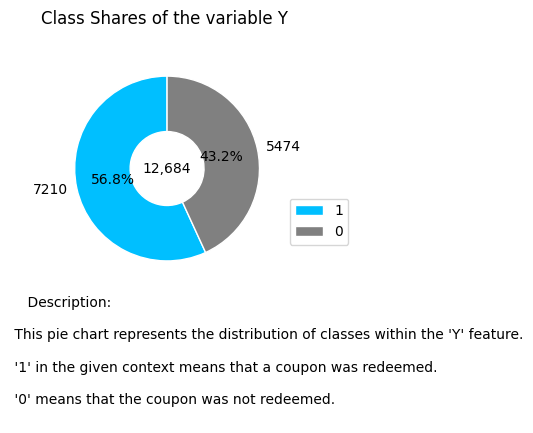


    The class shares are shown in the plotted figure.
    As stated in the description, Y = 1 means that the targeted customer redeemed the received coupon before it expired.
    


In [ ]:
## d. What are the class shares of the variable 'Y'? What does it mean if Y=1 in the given context?

# Counting absolute counts per class
class_counts = d['Y'].value_counts()

# Calculating shares from counts
class_shares = class_counts / len(d) * 100

# Create pie chart with customizations
colors = ['deepskyblue', 'grey'] # Choosing custom colors
plt.figure(figsize=(3, 3)) # Adjusting size
wedge, labels, autopcts = plt.pie(class_counts.values, labels=class_counts, autopct='%1.1f%%', startangle=90, colors=colors) # Setting up the pie diagram

# Style wedges for ring and color
plt.setp(wedge, width=0.6, edgecolor='white')

# Add counts outside the slices
total_count = class_counts.sum()
plt.annotate(f"{total_count:,}", xy=(0, 0), ha='center', va='center', fontsize=10)

# Formatting the diagram
legend_names = class_counts.index # Defining legend names
plt.legend(wedge, legend_names, loc='upper left', bbox_to_anchor=(1, 0.4))  # Adjusting legend position as needed

plt.title("Class Shares of the variable Y \n")

plt.text(
    -1.7, -1.2,
    """
    Description:
    \n This pie chart represents the distribution of classes within the 'Y' feature.
    \n '1' in the given context means that a coupon was redeemed.
    \n '0' means that the coupon was not redeemed.
    """,
    ha='left', va='top', fontsize=10
    )  # Adding text and adjusting position and size as needed

# Show the plot
plt.show()

print(
    """
    The class shares are shown in the plotted figure.
    As stated in the description, Y = 1 means that the targeted customer redeemed the received coupon before it expired.
    """
    )

In [ ]:
## e. Which numeric feature is correlated most strongly with Y?
corr_matrix = d.corr(numeric_only=True)


print(
    """
    Answer:
    Since the defined problem is binary we need to be careful when interpreting the correlations computed by 'corr_matrix'.
    They all seem very low - but this could be mainly due to the fact, that the outcome variable can only move between the values '0' and '1'.
    However, we can still look at the values to get an overall feeling, how the numeric features influence the outcome variable
    and which are the most influential once. The feature 'toCoupon_GEQ25min' has the highest correlation (- 0.10) with Y. This is not suprising.
    Logically it makes sense that the distance to the restaurant/coffee house at the time the coupon is issued has a high impact
    on the willingness of the customer to drive there to redeem it.
    It also makes sense, that the correlation is negative then and gets bigger for the features which indicate a further distance.
    -> the further away a customer is, the lower the willingness to redeem the coupon
    Another result worth mentioning is the missing value for the correlation of 'toCoupon_GEQ5min' with Y.
    This is due to the fact that the feature values are not varying in the given data set.
    (meaning: all customers observed were at least 5 minutes away from the place the coupon was issued for)
    \n
    """
    )

corr_matrix["Y"].sort_values(ascending=False)


    Answer:
    Since the defined problem is binary we need to be careful when interpreting the correlations computed by 'corr_matrix'.
    They all seem very low - but this could be mainly due to the fact, that the outcome variable can only move between the values '0' and '1'.
    However, we can still look at the values to get an overall feeling, how the numeric features influence the outcome variable
    and which are the most influential once. The feature 'toCoupon_GEQ25min' has the highest correlation (- 0.10) with Y. This is not suprising.
    Logically it makes sense that the distance to the restaurant/coffee house at the time the coupon is issued has a high impact
    on the willingness of the customer to drive there to redeem it.
    It also makes sense, that the correlation is negative then and gets bigger for the features which indicate a further distance.
    -> the further away a customer is, the lower the willingness to redeem the coupon
    Another result worth mentioni

Y                    1.000000
temperature          0.061240
direction_same       0.014570
direction_opp       -0.014570
has_children        -0.045557
toCoupon_GEQ15min   -0.081602
toCoupon_GEQ25min   -0.103633
toCoupon_GEQ5min          NaN
Name: Y, dtype: float64

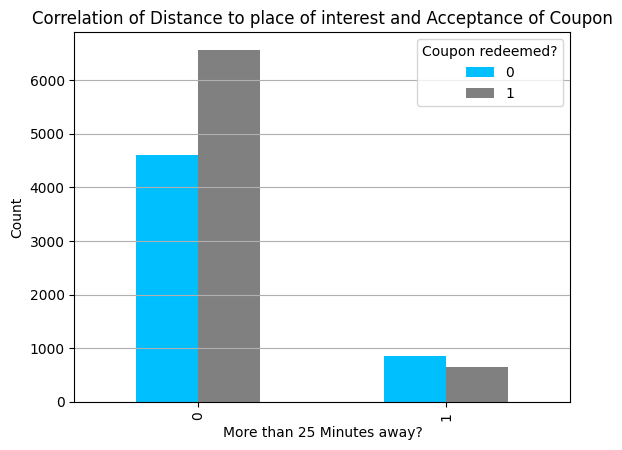



Y                     0     1
toCoupon_GEQ25min            
0                  4611  6562
1                   863   648

    

    What you can see here is that if the place of interest was more than 25 minutes away the recipients of the coupon were more likely to decline the offer.
    If they were closer to the place, they were more likely to redeem the given coupon.
    So there really seems to be a correlation between the variables despite of the relatively low correlation value.
    


In [ ]:
# Creating barplot of most correlating features with Y

# Group data for both features
grouped_data_corr_25 = d.groupby(["toCoupon_GEQ25min", "Y"])["Y"].count().unstack()

# Plot for "toCoupon_GEQ25min"
grouped_data_corr_25.plot(kind='bar', color=['deepskyblue', 'grey'])
plt.xlabel("More than 25 Minutes away?")
plt.ylabel("Count")
plt.title("Correlation of Distance to place of interest and Acceptance of Coupon")
plt.legend(title="Coupon redeemed?")
plt.grid(axis='y')

plt.show()

print("\n")
print(grouped_data_corr_25)
print(
    """
    \n
    What you can see here is that if the place of interest was more than 25 minutes away the recipients of the coupon were more likely to decline the offer.
    If they were closer to the place, they were more likely to redeem the given coupon.
    So there really seems to be a correlation between the variables despite of the relatively low correlation value.
    """
    )

### 4. Prepare the Data 1/2

a. Run the following command to drop the following 4 variables: <br>
*d = d.drop(['toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'direction_same', 'car'], axis=1).* <br>
b. Why does the feature 'direction_same' provide no (additional) useful information? <br>
c. Sample a test set, containing 20% of the data, and a training set, containing the remaining 80%. Set a seed for reproducibility. <br>
d. How many observations are in the test set and training set? <br>
e. What are the class shares of the variable 'Y' in the test set and training set, respectively? <br>

Your Answer / Code Below:

In [ ]:
## a. Run the following command to drop the following 4 variables: d = d.drop(['toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'direction_same', 'car'], axis=1).

d = d.drop(['toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'direction_same', 'car'], axis=1)
d.info()
print("\n As you can see the operation worked, since the features are not longer shown in the summary and the number of columns dropped to 22.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [ ]:
## b. Why does the feature 'direction_same' provide no (additional) useful information?

print(
    """
    Answer:
    There are two features describing if the direction the customer is driving is the same or the opposite direction from where the restaurant/coffee house is.
    Since they both mutually exclude each other it is sufficient to keep just one of these features.
    In this case we keep 'direction_opp' in the data set and delete direction_same since 'if direction_opp = 0 (FALSE) then direction_same = 1 (TRUE)'.
    """
    )


    Answer:
    There are two features describing if the direction the customer is driving is the same or the opposite direction from where the restaurant/coffee house is.
    Since they both mutually exclude each other it is sufficient to keep just one of these features.
    In this case we keep 'direction_opp' in the data set and delete direction_same since 'if direction_opp = 0 (FALSE) then direction_same = 1 (TRUE)'.
    


In [ ]:
## Because of the missing values in some of the variables, I would like to remove the observations with missing values
## from the data set before creating training and test data

d = d.dropna(axis=0)
d.info()

print(
    """
    Note:
    The number of observations drop to 12,079. I think this is still enough to train a good model.
    """
    )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-nul

In [ ]:
## c. Sample a test set, containing 20% of the data, and a training set, containing the remaining 80%. Set a seed for reproducibility.

# Splitting the data with random seed to ensure reproducability of the output
d_train, d_test = train_test_split(d, test_size=0.2, random_state=123)

In [ ]:
## d. How many observations are in the test set and training set?

print(f"Number of observations in training set: {len(d_train)} observations")
print(f"\nNumber of observations in test set: {len(d_test)} observations")

Number of observations in training set: 9663 observations

Number of observations in test set: 2416 observations


In [ ]:
## e. What are the class shares of the variable 'Y' in the test set and training set, respectively?

# Create DataFrames for class counts
class_counts_train = d_train["Y"].value_counts()
class_counts_test = d_test["Y"].value_counts()

# Add "Total" row for overall counts
class_counts_train["Total"] = class_counts_train.sum()
class_counts_test["Total"] = class_counts_test.sum()

# Calculate percentage shares (omitting "Total" row)
class_shares_train = (class_counts_train[:-1] / len(d_train))
class_shares_test = (class_counts_test[:-1] / len(d_test))

# Create final DataFrames with counts and shares
class_matrix_train = pd.DataFrame({
    "Count": class_counts_train[:-1],
    "Percentage": class_shares_train
})
class_matrix_test = pd.DataFrame({
    "Count": class_counts_test[:-1],
    "Percentage": class_shares_test
})

# Display the results
print("Class shares of label 'Y' for training set:")
print(class_matrix_train)

print("\nClass shares of label 'Y' for test set:")
print(class_matrix_test)

print("\n The classes of the target label 'Y' are equally distributed throughout the training and test sets.")

Class shares of label 'Y' for training set:
   Count  Percentage
1   5471     0.56618
0   4192     0.43382

Class shares of label 'Y' for test set:
   Count  Percentage
1   1406    0.581954
0   1010    0.418046

 The classes of the target label 'Y' are equally distributed throughout the training and test sets.


### 4. Prepare the Data 2/2

a. Drop 'Y' from the training set and store the resulting dataframe as 'X_train'. Do the same for the test set, storing it as 'X_test'. <br>
b. Store 'Y' from the training set as 'y_train'. Do the same for the test set, storing its 'Y' as 'y_test'. <br>
c. Use sklearn's Pipeline() function to create a pipeline that preprocesses the data (e.g., standardizing numeric features and applying one-hot-encoding to categorical features). You can, of course, explore if more elaborate feature engineering improves performance. <br> **Important:** Remember to fit the pipeline only on the training set ('X_train') using the 'pipeline.fit_transform()' function. Store the resulting dataframe as 'X_train_prepared'. <br>
d. Apply the pipeline also to 'X_test'. Store the resulting dataframe as 'X_test_prepared'. On the test set, use only the 'pipeline.transform()' function, not: 'pipeline.fit_transform()'.

Your Answer / Code Below:

In [ ]:
## a. Drop 'Y' from the training set and store the resulting dataframe as 'X_train'. Do the same for the test set, storing it as 'X_test'.

X_train = d_train.drop("Y", axis=1)
X_test = d_test.drop("Y", axis=1)

# Checking output to see if it worked
print(X_train.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9663 entries, 1326 to 3777
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           9663 non-null   object
 1   passanger             9663 non-null   object
 2   weather               9663 non-null   object
 3   temperature           9663 non-null   int64 
 4   time                  9663 non-null   object
 5   coupon                9663 non-null   object
 6   expiration            9663 non-null   object
 7   gender                9663 non-null   object
 8   age                   9663 non-null   object
 9   maritalStatus         9663 non-null   object
 10  has_children          9663 non-null   int64 
 11  education             9663 non-null   object
 12  occupation            9663 non-null   object
 13  income                9663 non-null   object
 14  Bar                   9663 non-null   object
 15  CoffeeHouse           9663 non-null

In [ ]:
## b. Store 'Y' from the training set as 'y_train'. Do the same for the test set, storing its 'Y' as 'y_test'.

y_train = d_train["Y"]
y_test = d_test["Y"]

# Checking output to see if it worked
print(y_train.info())
print(y_test.info())

<class 'pandas.core.series.Series'>
Int64Index: 9663 entries, 1326 to 3777
Series name: Y
Non-Null Count  Dtype
--------------  -----
9663 non-null   int64
dtypes: int64(1)
memory usage: 151.0 KB
None
<class 'pandas.core.series.Series'>
Int64Index: 2416 entries, 2617 to 3314
Series name: Y
Non-Null Count  Dtype
--------------  -----
2416 non-null   int64
dtypes: int64(1)
memory usage: 37.8 KB
None


In [ ]:
# Creating list of categorical and numerical features
categorical_features = [col for col in X_train.columns if X_train[col].dtype == 'object']
numerical_features = [col for col in X_train.columns if X_train[col].dtype == 'int64']
print(categorical_features)
print(numerical_features)

['destination', 'passanger', 'weather', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
['temperature', 'has_children', 'toCoupon_GEQ25min', 'direction_opp']


In [ ]:
## c. Use sklearn's Pipeline() function to create a pipeline that preprocesses the data
## (e.g., standardizing numeric features and applying one-hot-encoding to categorical features).
## You can, of course, explore if more elaborate feature engineering improves performance.
## Important: Remember to fit the pipeline only on the training set ('X_train') using the 'pipeline.fit_transform()' function.
## Store the resulting dataframe as 'X_train_prepared'.

# Create separate preprocessing pipelines for OHE and StandardScaling
preprocessing_pipeline_ohe = Pipeline([('preprocessing_cat', OneHotEncoder(handle_unknown='ignore'))])
preprocessing_pipeline_stscal = Pipeline([('preprocessing_num', StandardScaler())])

# Fit and transform the training data using the pipeline
X_train_prepared_cat = preprocessing_pipeline_ohe.fit_transform(X_train[categorical_features])
X_train_prepared_num = preprocessing_pipeline_stscal.fit_transform(X_train[numerical_features])

# Print the shape of the preprocessed data to verify
print(X_train_prepared_cat.shape)
print(X_train_prepared_num.shape)

# Concatenate the features to one training set again
X_train_prepared_cat = X_train_prepared_cat.toarray()
X_train_prepared = np.hstack((X_train_prepared_cat, X_train_prepared_num))

print(X_train_prepared.shape)

(9663, 102)
(9663, 4)
(9663, 106)


In [ ]:
## d. Apply the pipeline also to 'X_test'. Store the resulting dataframe as 'X_test_prepared'.
## On the test set, use only the 'pipeline.transform()' function, not: 'pipeline.fit_transform()'.

# Creating list of categorical and numerical features
categorical_features_test = [col for col in X_test.columns if X_test[col].dtype == 'object']
numerical_features_test = [col for col in X_test.columns if X_test[col].dtype == 'int64']

# Fit and transform the training data using the pipeline
X_test_prepared_cat = preprocessing_pipeline_ohe.transform(X_test[categorical_features])
X_test_prepared_num = preprocessing_pipeline_stscal.transform(X_test[numerical_features])

# Print the shape of the preprocessed data to verify
print(X_test_prepared_cat.shape)
print(X_test_prepared_num.shape)

# Concatenate the features to one training set again
X_test_prepared_cat = X_test_prepared_cat.toarray()
X_test_prepared = np.hstack((X_test_prepared_cat, X_test_prepared_num))

print(X_test_prepared.shape)

(2416, 102)
(2416, 4)
(2416, 106)


### 5. Shortlist Promising Models

a. Which methods covered in class could be used to address this problem? <br>
b. Briefly explain your method choice and which method you expect to perform best. Train at least 3 different machine learning methods. <br>
c. For each method, run *N*-fold cross-validation to compute the mean performance on the *N* folds. <br>
d. Plot the cross-validation results. <br>
**Important:** Do not assess model performance on the test set yet. <br>

Your Answer / Code Below:

In [ ]:
## a. Which methods covered in class could be used to address this problem?
# Supervised Learning // Binary Classification Problem
# -> suitable methods: Logistics Regression, K-Nearest_Neighbors (KNN), Support Vector Machines (SVM),
# Decision Tree, Random Forest, Neural Network

In [ ]:
## b. Briefly explain your method choice and which method you expect to perform best.
## Train at least 3 different machine learning methods.

# Explanation:

# Train Logistic Regression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_prepared, y_train)

# Train KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_prepared,y_train)

# Train SVM
from sklearn import svm

svm = svm.SVC()
svm.fit(X_train_prepared, y_train)

# Train Decision Tree
from sklearn import tree

dt = tree.DecisionTreeClassifier()
dt.fit(X_train_prepared, y_train)

# Train Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=15, max_depth=None, min_samples_split=2, random_state=0)
rf.fit(X_train_prepared, y_train)

# Train Neural Network
from sklearn.neural_network import MLPClassifier

nnet = MLPClassifier(max_iter=500, random_state=32)
nnet.fit(X_train_prepared, y_train)

MLPClassifier(max_iter=500, random_state=32)

In [ ]:
## c. For each method, run N-fold cross-validation to compute the mean performance on the N folds.

from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg_scores = cross_val_score(log_reg, X_train_prepared, y_train, cv=5)
print("Logistic Regression Accuracy: {:.2f}".format(log_reg_scores.mean()))

# KNN
knn_scores = cross_val_score(knn, X_train_prepared, y_train, cv=5)
print("K Nearest Neighbors Accuracy: {:.2f}".format(knn_scores.mean()))

# SVM
svm_scores = cross_val_score(svm, X_train_prepared, y_train, cv=5)
print("Support Vector Machine Accuracy: {:.2f}".format(svm_scores.mean()))

# Decision Tree
dt_scores = cross_val_score(dt, X_train_prepared, y_train, cv=5)
print("Decision Tree Accuracy: {:.2f}".format(dt_scores.mean()))

# Random Forest
rf_scores = cross_val_score(rf, X_train_prepared, y_train, cv=5)
print("Random Forest Accuracy: {:.2f}".format(rf_scores.mean()))

# Neural Network
nnet_scores = cross_val_score(nnet, X_train_prepared, y_train, cv=5)
print("Neural Network Accuracy: {:.2f}".format(nnet_scores.mean()))

Logistic Regression Accuracy: 0.68
K Nearest Neighbors Accuracy: 0.66
Support Vector Machine Accuracy: 0.75
Decision Tree Accuracy: 0.69
Random Forest Accuracy: 0.73
Neural Network Accuracy: 0.73


### 6. Fine-tune the System

a. Fine-tune the hyperparameters of the best-performing method (e.g., the number of trees in a Random Forest classifier). Again, run cross-validation on the training data. You are free to use either random or grid search. <br>
b. Once you are confident about your final model, measure its performance on the test set to estimate the generalization error. <br>
c. Print the confusion matrix of your final model, comparing its predictions against 'y_test'. Report also precision, recall, accuracy, and the F1-score. <br>

Your Answer / Code Below:

### 7. Present Your Solution

a. Ensure your code is documented well. <br>
b. Briefly summarize your results (e.g., best-performing method, hyperparameter choice). Use the dedicated cell below.<br>
c. Describe your key learnings: what went well, what didn't go well? <br>
d. What are your system's limitations? What would you try or change if you had more time for this machine learning project? <br>

Your Answer / Code Below:

In [ ]:
BEST_ACCURACY =     # accuracy on the TEST set of the winning method (in %)
NB_OF_METHODS =     # number of different ML methods (e.g., SVM, RF, etc.):
NB_OF_FIGURES =     # number of different figures (e.g., pie chart, bar chart, confusion matrix, etc.)

### 8. Launch

a. Save your final model. You do not need to submit it together with your Jupyter Notebook on Canvas. You can use the following command:

In [ ]:
import joblib
joblib.dump(my_model, "my_model.pkl")

### Congrats. You made it!